<img src = "https://raw.githubusercontent.com/nadyamissun/SVM/main/desain1.jpg"  align = "center">

<h1 align=center><font size = 5> SVM (Support Vector Machines)</font></h1>

Pada notebook ini, Kita akan menggunakan SVM (Support Vector Machines) untuk membuat dan melatih model menggunakan data rekam medis pasien gagal jantung, dan mengklasifikasikan kelangsungan hidup pasien.

SVM adalah Salah satu algoritma Machine Learning yang termasuk dalam kategori Supervised Learning. Tujuan utama SVM adalah Menemukan sebuah hyperplane pemisah yang optimal, yang memaksimalkan margin training data.


In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

###  Load the Heart Failure data 
Data ini diambil dari Kaggle yaitu kasus Heart Failure Prediction [https://www.kaggle.com/andrewmvd/heart-failure-clinical-data]. Dataset terdiri dari beberapa rekam medis pasien gagal  jantung. Dataset berisi 13 fitur, yang melaporkan informasi klinis, tubuh, dan gaya hidup, yang kami jelaskan secara singkat di sini. Beberapa fiturnya biner, yaitu: anemia, tekanan darah tinggi, diabetes, seks, dan merokok. Keterangan ini didapat dari jurnal DOI
[https://doi.org/10.1186/s12911-020-1023-5pendukung]

|Fitur|Deskripsi|
|--- |--- |
|Age|Age of the patient|
|Anaemia|Decrease of red blood cells or hemoglobin|
|High blood pressure|If a patient has hypertension|
|Creatinine phosphokinase|Level of the CPK enzyme in the blood|
|Diabetes|If the patient has diabetes|
|Ejection fraction|Percentage of blood leaving|
|Sex|Woman or man|
|Platelets|Platelets in the blood|
|Serum creatinine|Level of creatinine in the blood|
|Serum sodium|Level of sodium in the blood|
|Smoking|If the patient smokes|
|Time|Follow-up period|
|(target) death event|If the patient died during the follow-up period|

### Load Data From CSV File  and Explore Data

In [4]:
data = pd.read_csv("F:/MEDIUM/GITHUB/heart_failure_clinical_records_dataset.csv", sep = ';')
data.head()

,umur,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,tekanan_darah_tinggi,platelets,serum_creatinine,serum_sodium,Jenis_kelamin,smoking,time,Peristiwa_Kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
data.tail()

,umur,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,tekanan_darah_tinggi,platelets,serum_creatinine,serum_sodium,Jenis_kelamin,smoking,time,Peristiwa_Kematian
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [6]:
data.shape

(299, 13)

In [7]:
data.describe()

,umur,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,tekanan_darah_tinggi,platelets,serum_creatinine,serum_sodium,Jenis_kelamin,smoking,time,Peristiwa_Kematian
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


#### Melihat outlier

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

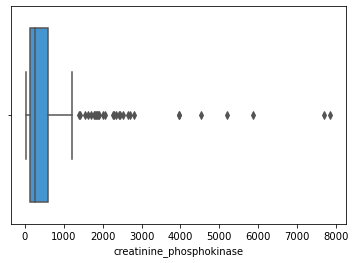

In [9]:
sns.boxplot(x = data.creatinine_phosphokinase, color = '#2e99e8')
plt.show()

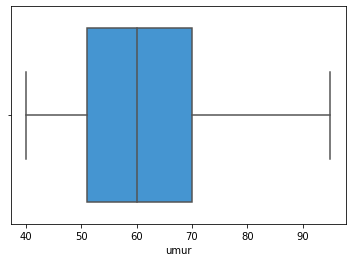

In [12]:
sns.boxplot(x = data.umur, color = '#2e99e8')
plt.show()

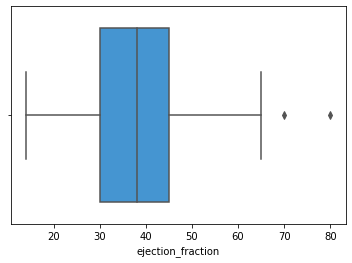

In [11]:
sns.boxplot(x = data.ejection_fraction, color = '#2e99e8')
plt.show()

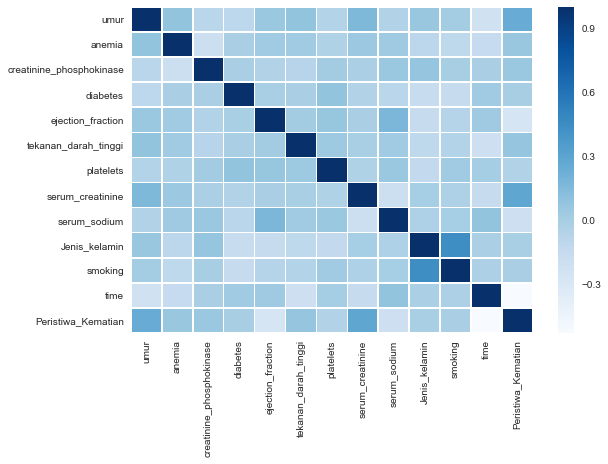

In [14]:
# Heatmap to Invertigate Correlation in Data
sns.set()
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(data.corr(), linewidths=.5, ax=ax, cmap='Blues')
plt.show()

In [15]:
y = data['Peristiwa_Kematian']
y.value_counts()

0    203
1     96
Name: Peristiwa_Kematian, dtype: int64

0    203
1     96
Name: Peristiwa_Kematian, dtype: int64


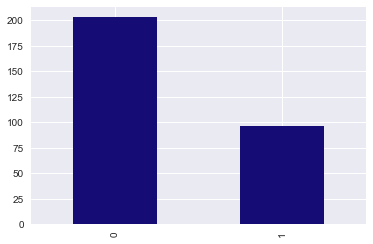

In [16]:
y.value_counts().plot.bar(color = '#150d75')
print(y.value_counts())

Pada gambar diatas dapat dipastikan bahwa dataset imbalance, karena jumlah pasien yang hidup (peristiwa kematian = 0) sebanyak 203, sedangkan yang meninggal (peristiwa kematian = 1) sebanyak 96. Secara statistik terdapat 32,11% positif dan 67,89% negatif.

In [17]:
x = data.iloc[:,0:-1]
x.head()

,umur,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,tekanan_darah_tinggi,platelets,serum_creatinine,serum_sodium,Jenis_kelamin,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


#### Menangani data imbalance

In [18]:
from imblearn.over_sampling import SMOTE

C:\Users\Nadya Asanul Husna\AppData\Roaming\Python\Python36\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\Nadya Asanul Husna\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [19]:
smote = SMOTE()
X_sm, y_sm = smote.fit_sample(x, y)

C:\Users\Nadya Asanul Husna\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [20]:
kolom = x.columns

In [21]:
kolom

Index(['umur', 'anemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'tekanan_darah_tinggi', 'platelets',
       'serum_creatinine', 'serum_sodium', 'Jenis_kelamin', 'smoking', 'time'],
      dtype='object')

In [22]:
df1 = pd.DataFrame(X_sm, columns=kolom) 

In [23]:
df1['label'] = y_sm

1    203
0    203
dtype: int64


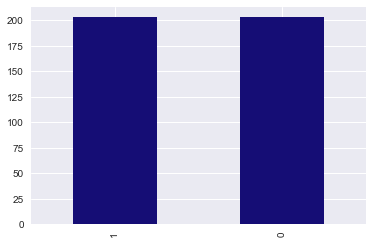

In [24]:
pd.Series(y_sm).value_counts().plot.bar(color = '#150d75')
print(pd.Series(y_sm).value_counts())

In [25]:
baru = df1.drop_duplicates()

In [26]:
baru.head()

,umur,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,tekanan_darah_tinggi,platelets,serum_creatinine,serum_sodium,Jenis_kelamin,smoking,time,label
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,1
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0,1
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0,1
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,7.0,1
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0,1


In [27]:
baru.shape

(406, 13)

In [28]:
fitur = baru.iloc[:,:-1]
fitur.head()

,umur,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,tekanan_darah_tinggi,platelets,serum_creatinine,serum_sodium,Jenis_kelamin,smoking,time
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,7.0
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0


In [29]:
target = baru['label']

1    203
0    203
Name: label, dtype: int64


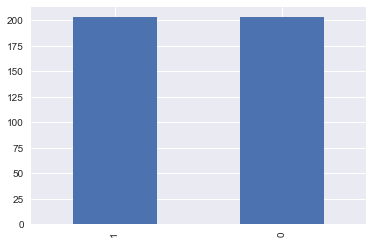

In [30]:
pd.Series(target).value_counts().plot.bar()
print(pd.Series(target).value_counts())

## Train/Test dataset

Okay, we split our dataset into train and test set:

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(fitur, target, stratify = target, test_size=0.2, random_state=52)

print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_train:', Y_train.shape)
print('Shape of Y_test:', Y_test.shape)

Shape of X_train: (324, 12)
Shape of X_test: (82, 12)
Shape of Y_train: (324,)
Shape of Y_test: (82,)


# Modeling (SVM with Scikit-learn)

Algoritme SVM menawarkan pilihan fungsi kernel untuk melakukan pemrosesannya. Pada dasarnya memetakan data ke dalam ruang dimensi yang lebih tinggi disebut kernel. Fungsi matematika yang digunakan untuk transformasi dikenal sebagai fungsi kernel, dan dapat memiliki tipe yang berbeda, seperti:

    1.Linear
    2.Polynomial
    3.Radial basis function (RBF)
    4.Sigmoid
    
Masing-masing fungsi ini memiliki karakteristik, pro dan kontra, dan persamaannya, tetapi karena tidak ada cara mudah untuk mengetahui fungsi mana yang berkinerja terbaik dengan kumpulan data tertentu, kami biasanya memilih fungsi yang berbeda secara bergantian dan membandingkan hasilnya. Mari kita gunakan default, RBF (Radial Basis Function) untuk praktek ini.

In [41]:
# Changing the kernel function

kernels = ["linear", "poly", "rbf", "sigmoid"]

In [43]:
report_listt = []

i = 1
for k in kernels:
    print("Model",i,"with Kernel =", k)
    i = i + 1
    model = svm.SVC(kernel= k, C = .01)
    model.fit(X_train, Y_train)

    Y_predict = model.predict(X_test)
    
    report = classification_report(Y_test, Y_predict, output_dict=True)
    report_listt.append(report)
    
    print(classification_report(Y_test, Y_predict))

Model 1 with Kernel = linear
              precision    recall  f1-score   support

           0       0.72      0.80      0.76        41
           1       0.78      0.68      0.73        41

    accuracy                           0.74        82
   macro avg       0.75      0.74      0.74        82
weighted avg       0.75      0.74      0.74        82

Model 2 with Kernel = poly
              precision    recall  f1-score   support

           0       1.00      0.02      0.05        41
           1       0.51      1.00      0.67        41

    accuracy                           0.51        82
   macro avg       0.75      0.51      0.36        82
weighted avg       0.75      0.51      0.36        82

Model 3 with Kernel = rbf
              precision    recall  f1-score   support

           0       0.50      0.85      0.63        41
           1       0.50      0.15      0.23        41

    accuracy                           0.50        82
   macro avg       0.50      0.50      0.43   

Kernel - linear  :: Avg Accuracy - 0.7475845410628019
Kernel - poly  :: Avg Accuracy - 0.7530864197530864
Kernel - rbf  :: Avg Accuracy - 0.5
Kernel - sigmoid  :: Avg Accuracy - 0.5


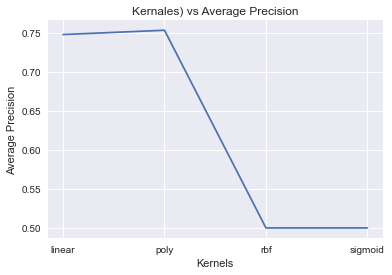

In [44]:
import matplotlib.pyplot as plt

y_prec = []
y_rec = []

for i in range(len(kernels)):
    y_prec.append(report_listt[i]['macro avg']['precision'])
    y_rec.append(report_listt[i]['macro avg']['recall'])
    
for i in range(len(kernels)):
    print("Kernel -",kernels[i]," :: Avg Accuracy -", y_prec[i])
    
# creating the bar plot 
plt.plot(kernels, y_prec)
plt.title("Kernales) vs Average Precision")
plt.xlabel("Kernels")
plt.ylabel("Average Precision")
plt.show()

## Hyperparameter Tuning of C (Regularization parameter)

In [46]:
# Change values of c to identify the best model.

clistt = [10, 1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.01, 0.001]

report_listt = []

i = 1
for c in clistt:
    print("Model",i,"with C =", c)
    i = i + 1
    model = svm.SVC(kernel='linear', C = c)
    model.fit(X_train, Y_train)

    Y_predict = model.predict(X_test)
    
    report = classification_report(Y_test, Y_predict, output_dict=True)
    report_listt.append(report)
    
    print(classification_report(Y_test, Y_predict))

Model 1 with C = 10
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        41
           1       0.68      0.68      0.68        41

    accuracy                           0.68        82
   macro avg       0.68      0.68      0.68        82
weighted avg       0.68      0.68      0.68        82

Model 2 with C = 1
              precision    recall  f1-score   support

           0       0.69      0.71      0.70        41
           1       0.70      0.68      0.69        41

    accuracy                           0.70        82
   macro avg       0.70      0.70      0.70        82
weighted avg       0.70      0.70      0.70        82

Model 3 with C = 0.9
              precision    recall  f1-score   support

           0       0.70      0.80      0.75        41
           1       0.77      0.66      0.71        41

    accuracy                           0.73        82
   macro avg       0.74      0.73      0.73        82
weighted avg  

#### Plot - C(Regularization parameter) vs Average Precision.

In [47]:
y_prec = []

for i in range(len(report_listt)):
    y_prec.append(report_listt[i]['macro avg']['precision'])
    
for i in range(len(clistt)):
    print("C(Regularization parameter) -",clistt[i]," :: Avg Accuracy -", y_prec[i])

C(Regularization parameter) - 10  :: Avg Accuracy - 0.6829268292682927
C(Regularization parameter) - 1  :: Avg Accuracy - 0.6952380952380952
C(Regularization parameter) - 0.9  :: Avg Accuracy - 0.7367781155015198
C(Regularization parameter) - 0.8  :: Avg Accuracy - 0.6829268292682927
C(Regularization parameter) - 0.7  :: Avg Accuracy - 0.7475845410628019
C(Regularization parameter) - 0.6  :: Avg Accuracy - 0.6829268292682927
C(Regularization parameter) - 0.5  :: Avg Accuracy - 0.6829268292682927
C(Regularization parameter) - 0.4  :: Avg Accuracy - 0.6708333333333334
C(Regularization parameter) - 0.3  :: Avg Accuracy - 0.6952380952380952
C(Regularization parameter) - 0.2  :: Avg Accuracy - 0.7206937799043063
C(Regularization parameter) - 0.1  :: Avg Accuracy - 0.6829268292682927
C(Regularization parameter) - 0.01  :: Avg Accuracy - 0.7475845410628019
C(Regularization parameter) - 0.001  :: Avg Accuracy - 0.6833631484794276


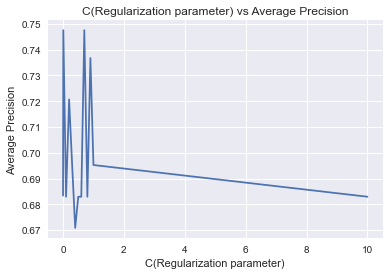

In [48]:
# creating the line plot 
plt.plot(clistt, y_prec)
plt.title("C(Regularization parameter) vs Average Precision")
plt.xlabel("C(Regularization parameter)")
plt.ylabel("Average Precision")
plt.show()

In [49]:
## Hyperparameter Tuning of Gamma (Kernel coefficient)

In [51]:
# Change values of gamma to identify the best model.

glistt = [1, 0.1, 0.01, 0.001, 0.0001]

report_listt = []

i = 1
for g in glistt:
    print("Model",i,"with gamma =", g)
    i = i + 1
    model = svm.SVC(kernel='linear', gamma = g)
    model.fit(X_train, Y_train)

    Y_predict = model.predict(X_test)
    
    report = classification_report(Y_test, Y_predict, output_dict=True)
    report_listt.append(report)
    
    print(classification_report(Y_test, Y_predict))

Model 1 with gamma = 1
              precision    recall  f1-score   support

           0       0.69      0.71      0.70        41
           1       0.70      0.68      0.69        41

    accuracy                           0.70        82
   macro avg       0.70      0.70      0.70        82
weighted avg       0.70      0.70      0.70        82

Model 2 with gamma = 0.1
              precision    recall  f1-score   support

           0       0.69      0.71      0.70        41
           1       0.70      0.68      0.69        41

    accuracy                           0.70        82
   macro avg       0.70      0.70      0.70        82
weighted avg       0.70      0.70      0.70        82

Model 3 with gamma = 0.01
              precision    recall  f1-score   support

           0       0.69      0.71      0.70        41
           1       0.70      0.68      0.69        41

    accuracy                           0.70        82
   macro avg       0.70      0.70      0.70        82


#### Plot - Gamma (Kernel coefficient) vs Average Precision.

In [52]:
import matplotlib.pyplot as plt

y_prec = []

for i in range(len(report_listt)):
    y_prec.append(report_listt[i]['macro avg']['precision'])
    
for i in range(len(glistt)):
    print("Gamma (Kernel coefficient) -",glistt[i]," :: Avg Accuracy -", y_prec[i])

Gamma (Kernel coefficient) - 1  :: Avg Accuracy - 0.6952380952380952
Gamma (Kernel coefficient) - 0.1  :: Avg Accuracy - 0.6952380952380952
Gamma (Kernel coefficient) - 0.01  :: Avg Accuracy - 0.6952380952380952
Gamma (Kernel coefficient) - 0.001  :: Avg Accuracy - 0.6952380952380952
Gamma (Kernel coefficient) - 0.0001  :: Avg Accuracy - 0.6952380952380952


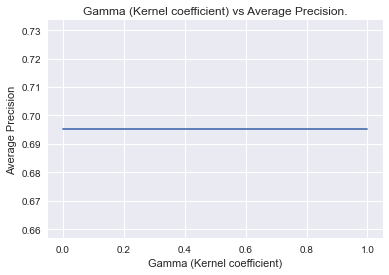

In [53]:
# creating the bar plot 
plt.plot(glistt, y_prec)
plt.title("Gamma (Kernel coefficient) vs Average Precision.")
plt.xlabel("Gamma (Kernel coefficient)")
plt.ylabel("Average Precision")
plt.show()

Semua nilai gamma memberikan presisi yang sama seperti grafik langsung di atas

### Confusion Matrix and Classification Report

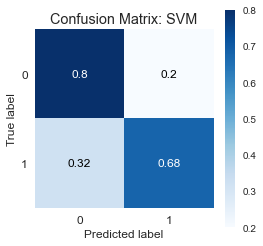

In [60]:
# C  =  0.01
import scikitplot as skplt

model = svm.SVC(kernel='linear', C = .01)
model.fit(X_train, Y_train)

Y_predict = model.predict(X_test)

skplt.metrics.plot_confusion_matrix(Y_test, Y_predict, figsize=(4,4), 
                                title='Confusion Matrix: SVM',
                                normalize=True,
                                cmap='Blues')

In [61]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76        41
           1       0.78      0.68      0.73        41

    accuracy                           0.74        82
   macro avg       0.75      0.74      0.74        82
weighted avg       0.75      0.74      0.74        82



## Apply Grid search feature in sklearn to find best hyperparamenters(C, gamma).

Applying Gridsearch to find the best Model.

In [63]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.492, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.492, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.492, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.492, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.492, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=None)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=None)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.492, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.492, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.492, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.492, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.492, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.492, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.516, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.523, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.477, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.508, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.508, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.516, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.554, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=None)]: Done 125 out of 125 | elapsed:    0.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [64]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


### Best SVM using Grid Search

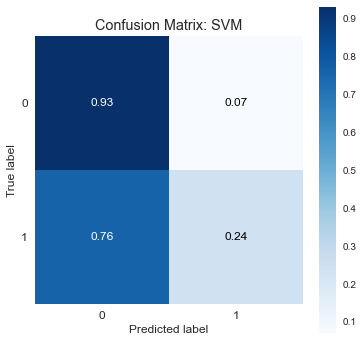

In [65]:
model = svm.SVC(kernel='rbf', C = 10, gamma = 0.0001)
model.fit(X_train, Y_train)

Y_predict = model.predict(X_test)

skplt.metrics.plot_confusion_matrix(Y_test, Y_predict, figsize=(6,6), 
                                    title='Confusion Matrix: SVM',
                                    normalize=True,
                                    cmap='Blues')

plt.show()

In [66]:
report = classification_report(Y_test, Y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.55      0.93      0.69        41
           1       0.77      0.24      0.37        41

    accuracy                           0.59        82
   macro avg       0.66      0.59      0.53        82
weighted avg       0.66      0.59      0.53        82

